# Project Phase II

## The Project
Our motivation for this project is to uncover common physical characteristics based on the duration of one's workout, and be able to give workout recommendations given physical traits using an ML model trained on our data. Two main questions we want to explore are:
1. How do workout and internal characteristics vary for individuals of a certain height and weight?
2. What is the average amount of calories burnt for and the workout duration of those individuals with a healthy physique?

## The Pipeline
Here is an overview of our data processing pipeline that we demonstrate below:
* We start off by scraping Kaggle's site of our dataset using <u>def scrape</u>, which generates a zip file in the user's Files system containing the calories dataset.
* In <u>def get_data</u>, we read in the calories.csv from the zipped folder produced in def scrape.
* <u>Def add_bmi</u> uses the dataframe from get_data and creates a new column of the BMI for each record. This will be helpful when creating the predictive ML model.
* <u>Def classify_bmi</u> will categorize the "healthy" vs "unhealthy" BMI in each record, allowing us to gauge the population of unhealthy individuals in our dataset.
* Finally, we have our two plots. <u>def bar_plot</u> breaks out the data set into the categorized healthy and unhealthy groups made from def classify_bmi, and <u>def regression_plot</u> lets us see workout behavior in these categories, helping us understand this dataset's trend and what areas we need to address.

###### The Project
Our motivation of this project is to uncover common physical characteristics based on the duration of one's workout, and be able to give workout recommendations given physical traits using an ML model trained on our data. Two main questions we want to explore are:
1. How do workout and internal characteristics vary for individuals of a certain height and weight?
2. What is the average amount of calories burnt for and the workout duration of those individuals with a healthy physique?

## The Pipeline
Here is an overview of our data processing pipeline that we demonstrate below:
* We start off by scraping Kaggle's site of our dataset using <u>def scrape</u>, which generates a zip file in the user's Files system containing the calories dataset
* In <u>def get_data</u>, we read in the calories.csv from the zipped folder produced in def scrape
* <u>Def add_bmi</u> uses the dataframe from get_data and creates a new column of the BMI for each record. This will be helpful when creating the predictive ML model
* The <u>def classify_bmi</u> function will categorize the "healthy" vs "unhealthy" BMI in each record, allowing us to gauge the population of unhealthy individuals in our dataset.
* We finally have our two plotting functions, <u>def bar_plot</u> and <u>def regression_plot</u>. These are our two starter visuals to help us with our ML model.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import warnings
import plotly.express as px
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
username = 'rohanbatra8'
key = 'db9b00f3a8c45858cf4e75c395cdba2c'

In [5]:
def scrape(username, key):
    ''' scrapes Kaggle for our calories dataset
    
    Args: username (string) - the username of the Kaggle user we can access the dataset through
          key (string) - the Kaggle string to reach the environment
    Returns: none - nothing is returned to the user, but a folder containing calories.csv is created in the user's Files system
        
    '''
    
    # Cell 1: Install Kaggle API 
    !pip install kaggle
    
    # Cell 2: Set Kaggle API credentials
    import os
    os.environ['KAGGLE_USERNAME'] = username  
    os.environ['KAGGLE_KEY'] = key            
    
    # Cell 3: Download the dataset
    !kaggle datasets download -d ruchikakumbhar/calories-burnt-prediction
    
    # Cell 4: Unzip the downloaded file, automatically answering 
    !echo y | unzip calories-burnt-prediction.zip


In [7]:
def get_data():
    ''' read in data and return as a dataframe

    Args: nothing
    Returns: df (dataframe) - dataframe of the csv

    '''
    
    df = pd.read_csv('calories.csv')

    return df

In [9]:
def add_bmi(df):
    ''' adds the calculated field for BMI using height and weight fields

    Args: df (dataframe) - the dataframe we created from get_data
    Returns: df (dataframe) - the same dataframe but with an added BMI column

    '''

    df['BMI'] = df['Weight'] / (df['Height']* .01) ** 2

    return df

In [121]:
def classify_bmi(bmi):
    ''' categorizes the BMIs into 'healthy' and 'unhealthy' for plotting

    Args: bmi (dataframe column) - the BMI column created by add_bmi
    Returns: function to apply to the dataframe so it is updated with the new 'BMI_Category' column

    '''
    
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Healthy'
    else:
        return 'Unhealthy'

In [125]:
def bar_plot(df):
    ''' creates bar plot based on the BMI Category and count of recrods
    
    Args: df (dataframe) - the dataframe we updated with add_bmi and classify_bmi
    Returns: fig - bar plot made with plotly

    '''
    
    bmi_grouped = df.groupby('BMI_Category').size().reset_index(name = 'Count')
    fig = px.bar(bmi_grouped, 
                 x = "BMI_Category", 
                 y = "Count", 
                 text = "Count", 
                 title = "Distribution of BMI Categories",
                 labels = {"Count": "Number of People", "BMI_Category": "BMI Category"})
    
    fig.update_layout(height = 600)
    
    fig.show()

In [145]:
def regression_plot(df):
    ''' creates a regression plot displaying the the calories burned per workout duration for each individual

    Args: df (dataframe) - the dataframe we updated with add_bmi and classify_bmi
    Returns: fig - regression plot with plotly

    '''
    colors = {'Unhealthy': 'orange',
              'Healthy': 'blue'}
    
    fig = px.scatter(df, x = "Duration", y = "Calories", trendline = "ols",
                     title = "Regression Plot: Workout Duration vs. Calories Burned",
                     labels = {"Duration": "Workout Duration (min)", "Calories": "Calories Burned"},
                     color = 'BMI_Category',
                     color_discrete_map = colors)

    fig.update_traces(marker=dict(opacity=0.5))
    fig.update_layout(height = 600)
    
    fig.show()

In [11]:
raw_data = get_data()
data = add_bmi(raw_data)
data['BMI_Category'] = data['BMI'].apply(classify_bmi)

## Plot 1
#### Bar Plot: Distribution of BMI Categories

This visualization helps us see that approximately 40% of the dataset has an Unhealthy BMI. This indicates a sizeable population that would find our project useful.

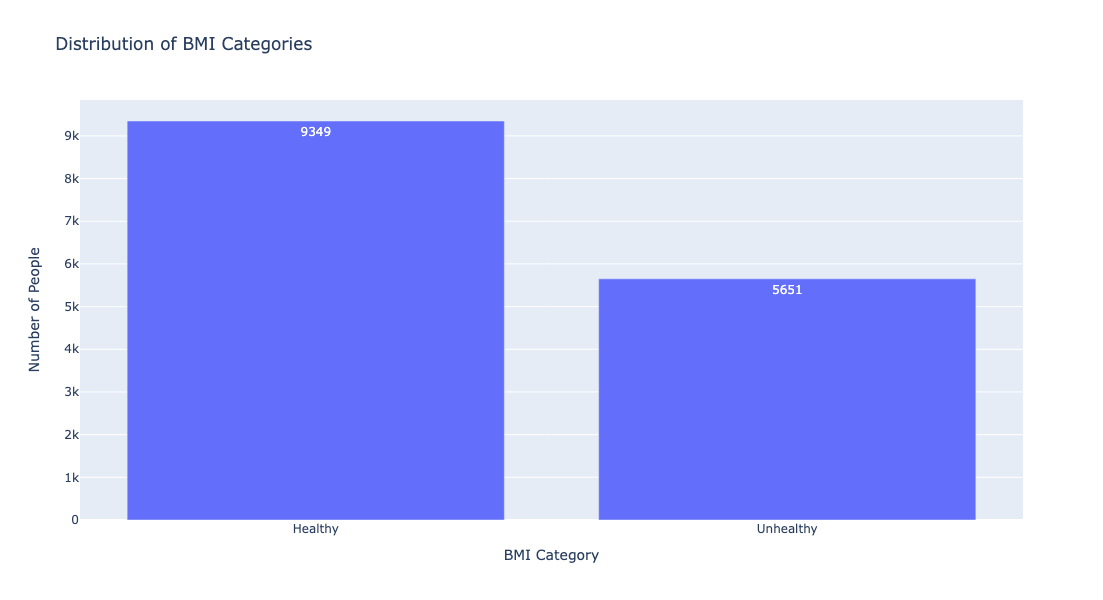

In [127]:
bar = bar_plot(data)
bar

## Plot 2
### Regression Plot: Workout Duration vs. Calories Burned

We can derive from this visualization that most of our Unhealthy BMI individuals burn more calories than our healthier individuals, and work out for longer (as seen from the orange data points migrating towards the top right). This could mean they are working towards a healthier BMI by taking more time to work out and burn more calories. Still, it could also indicate that they are overworking themselves and not hitting optimal workout duration and calories burned.

We want to model our suggestions based on the range presented by the Health BMI individuals.

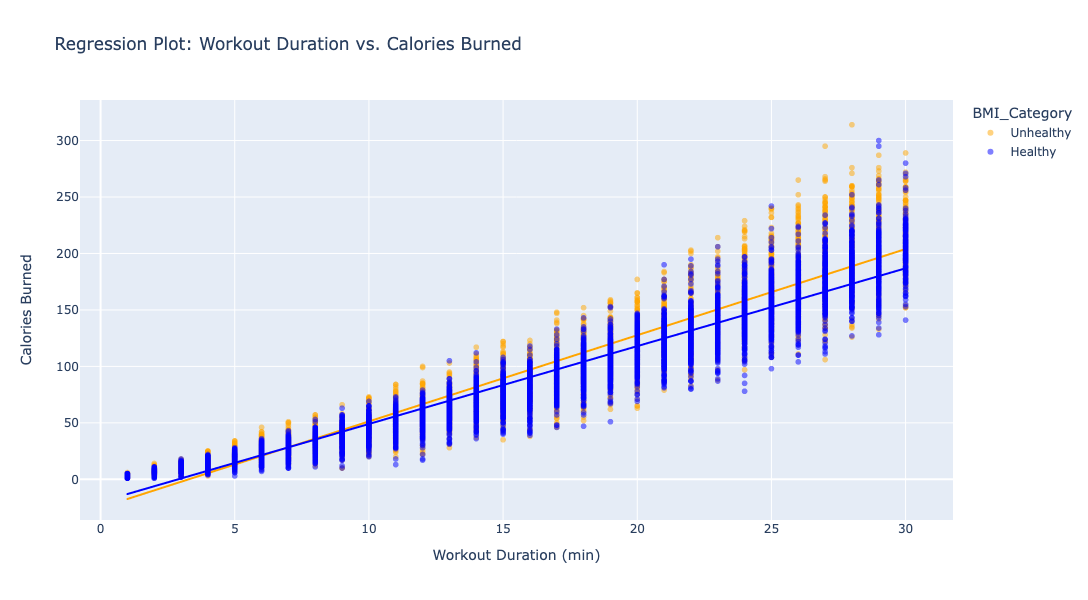

In [147]:
regression = regression_plot(data)
regression